In [38]:
import cv2 as cv
from PIL import ImageGrab
from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt

In [76]:
@dataclass
class Coordinate:
    x: int
    y: int

    def __add__(self, other):
        return Coordinate(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Coordinate(self.x - other.x, self.y - other.y)

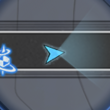

In [77]:
offset = 72
screen = ImageGrab.grab((0,offset,1280,720+offset))

MINIMAP_CENTER = Coordinate(117,200)
MINIMAP_PAD = Coordinate(55,55)
MINIMAP_TOP_LEFT = MINIMAP_CENTER - MINIMAP_PAD
MINIMAP_BOTTOM_RIGHT = MINIMAP_CENTER + MINIMAP_PAD
minimap = ImageGrab.grab((
    MINIMAP_TOP_LEFT.x,
    MINIMAP_TOP_LEFT.y,
    MINIMAP_BOTTOM_RIGHT.x,
    MINIMAP_BOTTOM_RIGHT.y))
minimap

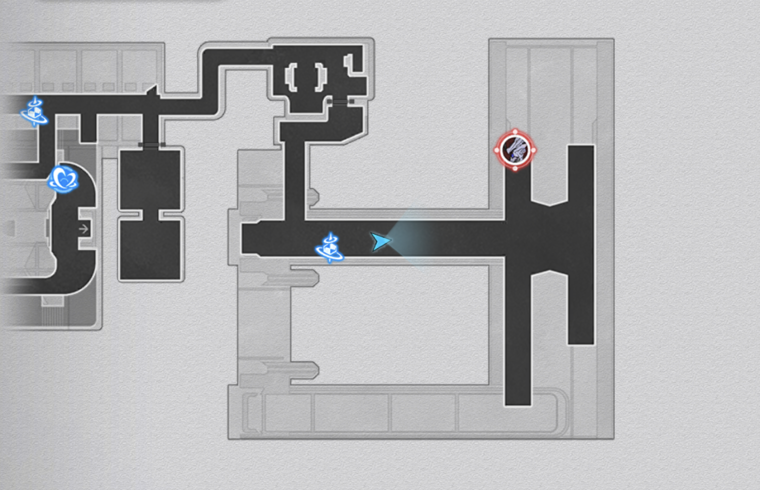

In [78]:
# navigate to map
map = ImageGrab.grab((100,210,860,700))
map

In [79]:
minimap_cv = cv.cvtColor(np.array(minimap), cv.COLOR_RGB2BGR)
map_cv = cv.cvtColor(np.array(map), cv.COLOR_RGB2BGR)

minimap_gray = cv.cvtColor(minimap_cv, cv.COLOR_BGR2GRAY)
map_gray = cv.cvtColor(map_cv, cv.COLOR_BGR2GRAY)

Confidence: 0.5907198190689087


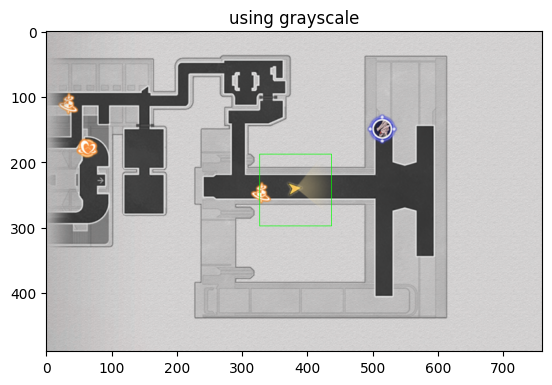

In [80]:
result = cv.matchTemplate(map_gray, minimap_gray, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
print(f"Confidence: {max_val}")
top_left = max_loc
bottom_right = (top_left[0] + minimap_cv.shape[1], top_left[1] + minimap_cv.shape[0])

cv.rectangle(map_cv, top_left, bottom_right, (0, 255, 0), 1)
plt.title('using grayscale')
plt.imshow(map_cv)

In [81]:
minimap_gray
_, minimap_binary = cv.threshold(minimap_gray, 185, 255, 0)
map_gray
_, map_binary = cv.threshold(map_gray, 215, 255, 0)

Confidence: 0.7339085340499878


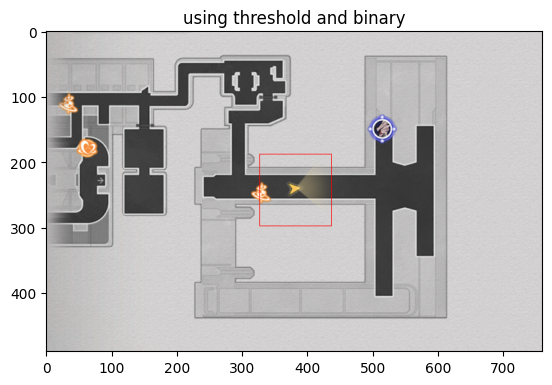

In [82]:
result = cv.matchTemplate(map_binary, minimap_binary, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
print(f"Confidence: {max_val}")
top_left = max_loc
bottom_right = (top_left[0] + minimap_cv.shape[1], top_left[1] + minimap_cv.shape[0])

cv.rectangle(map_cv, top_left, bottom_right, (255, 0, 0), 1)
plt.title('using threshold and binary')
plt.imshow(map_cv)

In [83]:
lsd = cv.ximgproc.createFastLineDetector()
minimap_lines = lsd.detect(minimap_gray)
map_lines = lsd.detect(map_gray)

In [84]:
height, width = minimap_gray.shape
empty_image = np.zeros((height, width, 3), dtype=np.uint8)
minimap_lsd = lsd.drawSegments(empty_image, minimap_lines)

In [85]:
height, width = map_gray.shape
empty_image = np.zeros((height, width, 3), dtype=np.uint8)
map_lsd = lsd.drawSegments(empty_image, map_lines)

Confidence: 0.5486327409744263


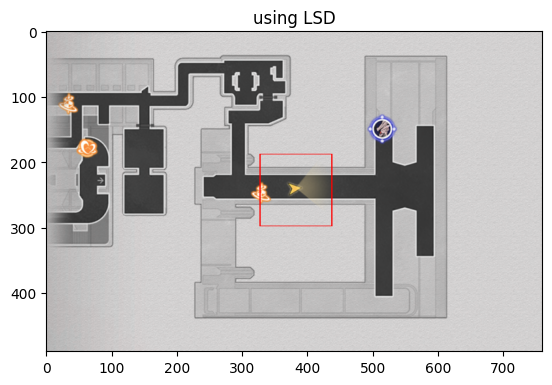

In [86]:
result = cv.matchTemplate(map_lsd, minimap_lsd, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
print(f"Confidence: {max_val}")
top_left = max_loc
bottom_right = (top_left[0] + minimap_cv.shape[1], top_left[1] + minimap_cv.shape[0])

cv.rectangle(map_cv, top_left, bottom_right, (255, 0, 0), 1)
plt.title('using LSD')
plt.imshow(map_cv)